In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mne import read_epochs
from sklearn.preprocessing import LabelEncoder
from jupyterthemes.stylefx import set_nb_theme
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
set_nb_theme('gruvboxd')

In [58]:
epochs = read_epochs('nirs_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\mrl\nirs_epo.fif ...
    Found the data of interest:
        t =   -4992.00 ...   19968.00 ms
        0 CTF compensation matrices available
Not setting metadata
127 matching events found
No baseline correction applied
0 projection items activated


In [59]:
epochs['rest','left']

Number of events,51
Events,left: 25rest: 26
Time range,-4.992 – 19.968 sec
Baseline,-3.000 – 0.000 sec


In [60]:
data = epochs['left','rest'].copy().crop(5,12).to_data_frame()


In [61]:
data

,time,condition,epoch,S1_D1 hbo,S1_D1 hbr,S1_D3 hbo,S1_D3 hbr,S2_D2 hbo,S2_D2 hbr,S2_D3 hbo,...,S7_D3 hbo,S7_D3 hbr,S7_D4 hbo,S7_D4 hbr,S8_D1 hbo,S8_D1 hbr,S8_D3 hbo,S8_D3 hbr,S8_D4 hbo,S8_D4 hbr
0,4.992,rest,2,-6.219718,2.413216,-176.750269,210.532904,20.222291,2.265158,18.391565,...,21.179636,-5.743767,24.464967,-4.625324,89.860732,-119.562712,7.828846,5.793557,-123.506325,146.405117
1,5.120,rest,2,-1.025354,2.399710,-209.525562,239.320012,19.031995,1.883894,16.745142,...,19.637806,-5.704881,22.479666,-4.566667,77.334400,-111.673413,8.526215,3.662675,-99.383564,121.760444
2,5.248,rest,2,3.536937,2.685491,-237.473898,261.237088,17.357534,1.385069,14.887399,...,17.651248,-5.390733,19.912006,-4.453294,60.211049,-101.308506,8.713579,1.859140,-74.727592,96.142263
3,5.376,rest,2,7.035109,3.156106,-253.411185,271.144585,15.434678,0.862933,12.999721,...,15.442161,-4.902879,16.931477,-4.376650,40.654177,-89.660760,8.357331,0.588138,-51.848081,72.473187
4,5.504,rest,2,9.232032,3.696358,-251.260382,264.900853,13.473546,0.402273,11.235816,...,13.251361,-4.350155,13.735269,-4.400357,21.193959,-78.036930,7.466538,-0.010997,-32.446998,52.780139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,11.520,rest,126,-0.759818,14.125589,-11.192166,-71.210692,-20.666563,5.219618,-11.048223,...,-29.239416,10.871328,-19.198180,14.395026,-7.351565,-29.876979,-37.635698,6.778789,-16.232680,-3.263633
2852,11.648,rest,126,2.089848,17.339071,-4.588765,-77.543329,-29.839652,4.798242,-14.952474,...,-30.994244,13.155441,-19.104309,17.431026,-14.203924,-16.031772,-40.638293,4.674396,-35.573212,2.212216
2853,11.776,rest,126,5.478440,20.739017,-4.661307,-71.284638,-39.229351,4.209635,-18.350047,...,-32.007676,15.469477,-18.495855,20.597610,-17.603765,-5.414096,-43.069929,2.984697,-57.756981,9.468125
2854,11.904,rest,126,9.131224,23.911060,-11.364937,-53.848406,-48.162994,3.415461,-21.137304,...,-32.263415,17.580678,-17.548271,23.529143,-17.038910,0.826167,-44.694316,1.859986,-79.990074,17.700733


In [62]:
hbo_cols = [col for col in data.columns if 'hbo' in col ]

In [63]:
mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
maxi = data.groupby('epoch')[hbo_cols].max()
mini = data.groupby('epoch')[hbo_cols].min()
skw = data.groupby('epoch')[hbo_cols].skew()

C:\Users\Alberto\AppData\Local\Temp\ipykernel_3208\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_3208\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_3208\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_3208\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a f

In [64]:
mean

,,S1_D1 hbo,S1_D3 hbo,S2_D2 hbo,S2_D3 hbo,S2_D4 hbo,S3_D1 hbo,S3_D2 hbo,S3_D3 hbo,S4_D2 hbo,S4_D4 hbo,S5_D1 hbo,S5_D3 hbo,S6_D2 hbo,S6_D4 hbo,S7_D2 hbo,S7_D3 hbo,S7_D4 hbo,S8_D1 hbo,S8_D3 hbo,S8_D4 hbo
epoch,condition,,,,,,,,,,,,,,,,,,,,
2,rest,3.601507,213.937482,5.716648,6.649741,45.785232,4.307658,5.968606,8.221302,5.751978,6.654694,4.285290,5.581632,2.936292,16.377741,5.825210,7.512194,11.278797,33.404302,4.958164,91.586067
7,left,6.931049,82.007372,7.259668,12.783904,63.644596,7.667366,15.184433,14.331213,12.526284,20.784698,6.610375,14.884103,15.017049,23.298251,16.175638,17.692499,18.313082,66.422469,13.547790,85.984427
13,left,7.746708,146.830865,8.078619,7.113942,58.615638,19.608043,8.095568,11.466878,16.304144,9.261469,14.785643,16.949324,13.379013,24.682294,18.390099,14.937650,20.296150,44.293928,12.748063,152.419484
14,left,11.037427,145.196155,5.875046,7.980284,50.991833,7.906907,9.832439,10.234396,7.505796,16.730668,5.925268,14.864070,10.975622,21.323976,15.742530,17.033564,15.422319,38.874662,13.576632,108.265059
18,left,4.406036,144.342124,5.325777,4.628620,53.902841,1.116065,4.154927,2.837590,4.849312,6.719294,3.020173,4.322435,6.324058,6.798121,7.444811,7.186222,6.364837,26.796011,6.937324,125.188611
19,left,8.457454,85.635952,6.838004,6.445973,47.096148,13.951253,8.506959,8.921836,9.351644,11.434008,7.357860,11.927212,10.815697,15.568855,17.630232,16.292967,24.276727,19.323557,11.781763,136.665119
21,rest,18.001226,89.456358,5.014131,4.708108,34.614051,3.904954,4.947863,4.401930,7.591340,12.347787,5.025098,2.997926,8.329925,8.611701,11.150878,13.107687,10.939710,36.914293,8.111169,93.037034
23,left,4.519916,66.764496,7.409271,6.838881,37.146473,6.520592,9.594449,7.411713,13.798081,17.481998,6.994439,4.916553,11.081303,13.222516,15.683131,12.291287,15.640663,33.234158,7.593407,79.187535
24,rest,6.694386,114.991119,9.822659,7.552031,52.807058,7.433684,9.939398,8.024528,13.654611,8.509169,9.743719,7.918834,10.906206,17.367427,16.512211,15.229274,17.497905,30.625608,11.585557,76.626136


In [65]:
grouped = mean.groupby(['epoch','condition']).count()

In [66]:
grouped.index.values
y = [i[1] for i in grouped.index.values]

In [67]:
grouped.index.values

array([(2, 'rest'), (7, 'left'), (13, 'left'), (14, 'left'), (18, 'left'),
       (19, 'left'), (21, 'rest'), (23, 'left'), (24, 'rest'),
       (25, 'left'), (26, 'left'), (27, 'rest'), (29, 'rest'),
       (31, 'rest'), (34, 'rest'), (42, 'rest'), (44, 'left'),
       (45, 'rest'), (48, 'rest'), (51, 'rest'), (53, 'rest'),
       (55, 'rest'), (56, 'left'), (57, 'rest'), (58, 'left'),
       (59, 'left'), (60, 'left'), (62, 'rest'), (69, 'left'),
       (70, 'rest'), (72, 'rest'), (74, 'left'), (75, 'left'),
       (78, 'left'), (80, 'rest'), (88, 'left'), (92, 'left'),
       (97, 'left'), (99, 'left'), (102, 'rest'), (104, 'rest'),
       (106, 'left'), (108, 'rest'), (111, 'rest'), (112, 'left'),
       (115, 'left'), (119, 'rest'), (121, 'rest'), (122, 'left'),
       (123, 'rest'), (126, 'rest')], dtype=object)

In [68]:
le = LabelEncoder()
y = le.fit_transform(y)

In [69]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=34)
lda = LinearDiscriminantAnalysis()

In [70]:
scores_m = cross_val_score(lda, mean.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [71]:
scores_mx = cross_val_score(lda, maxi.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [72]:
scores_mn = cross_val_score(lda, mini.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [73]:
scores_sk = cross_val_score(lda, skw.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [74]:
scores = [scores_m, scores_mx, scores_mn, scores_sk]

In [75]:
scores_df = pd.DataFrame(data=np.transpose(scores), columns=['mean','max','min','skew'])

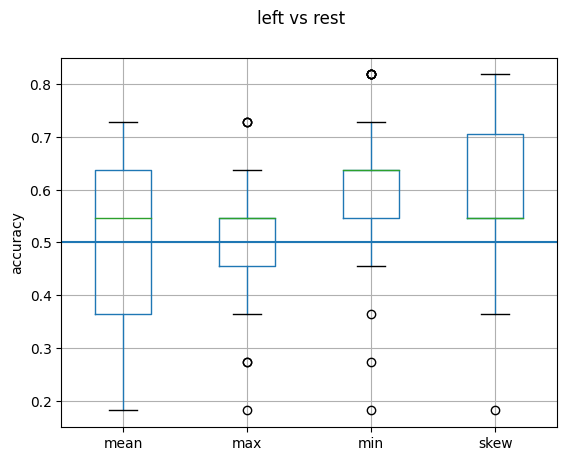

In [76]:
csp_fig, axes = plt.subplots(1)
scores_df.boxplot(ax=axes)
axes.axhline(0.5)
axes.set_ylabel('accuracy')
csp_fig.suptitle('left vs rest')
plt.show()

In [77]:
scores_df.median().to_numpy()

array([0.54545455, 0.54545455, 0.63636364, 0.54545455])